In [1]:
#Importing Libraries 

import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast

#Loading Data 

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup 

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)



In [6]:
#Only get Data analyst jobs in the US 

df_da_us = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

#Drop NaN values from the salary_year_avg column for accurate visualization 

df_da_us = df_da_us.dropna(subset='salary_year_avg')


In [12]:
#explode job_skills column to show each skill in a single row 

df_da_us = df_da_us.explode('job_skills')
 
#checking to see if it worked 

df_da_us['job_skills'].sample(10)

739157           sql
562869    sharepoint
20635         looker
216966           sql
576822         spark
608352    databricks
471800       mongodb
420740       outlook
297107        python
183695             r
Name: job_skills, dtype: object

In [17]:
df_da_us_group = df_da_us.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_da_us_group

,count,median
job_skills,,
airflow,44,116250.00
airtable,5,90000.00
alteryx,106,106281.25
angular,8,107500.00
ansible,1,159640.00
...,...,...
wire,4,74250.00
word,461,81194.75
workfront,3,75000.00


In [ ]:
#creating a data frame of top 10 salaries associated with job_skills
df_da_top_pay = df_da_us_group.sort_values(by='median', ascending = False).head(10)

df_da_top_pay


,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [27]:
#creating another dataframe of top 10 most common skills 
df_da_skills = df_da_us_group.sort_values(by='count', ascending=False).head(10)
df_da_skills = df_da_skills.sort_values(by='median', ascending=False).head(10)

df_da_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


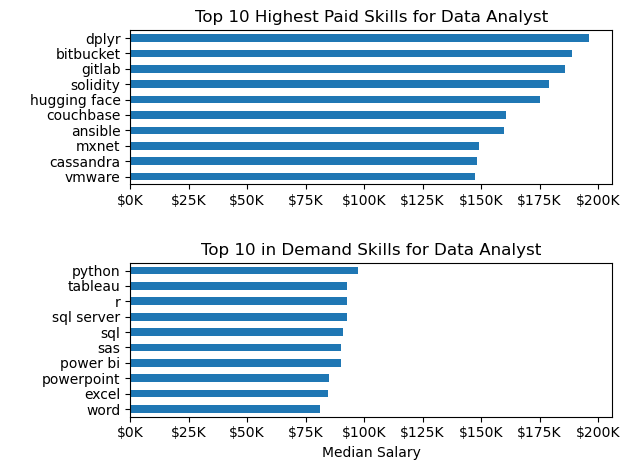

In [40]:
fig, ax = plt.subplots(2,1)

df_da_top_pay[::-1].plot(kind='barh', y ='median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analyst')
ax[0].set_ylabel(' ')
ax[0].set_xlabel(' ')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

df_da_skills[::-1].plot(kind='barh', y ='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 in Demand Skills for Data Analyst')
ax[1].set_ylabel(' ')
ax[1].set_xlabel('Median Salary')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


#changing the xlim for both figures by set_xlim on the bottom plot to match the current xlim of top plot
ax[1].set_xlim(ax[0].get_xlim())

fig.tight_layout()
